# Ejercicio 001: Realiza la limpieza y almacenamiento de dos conjuntos de datos
1. **Crea espacio de trabajo:** 
   - Crea los folders:
     - `figs/` a nivel de  notebooks.
     ![image.png](attachment:image.png)
     - `002_intermediate` y `003_processed` adentro de data.
![image-2.png](attachment:image-2.png)
2. **Preparación inicial:**
   - Localiza y analiza los siguientes archivos:
     - `esolmet_2018.xlsx`
     - `ruoa_enero_2018.txt`
     
 Puedes utilizar un editor de texto como Notepadd++ y una hoja de cálculo como Excel u OpenOffice, para familiarizarte con su estructura y codificación:



3. **Lectura y procesamiento del archivo Excel:**
   - Lee el archivo `esolmet_2018.xlsx` ubicado en el directorio `data/001_raw/`. Utiliza las siguientes especificaciones:
     - Índice en la primera columna.
     - Reconocimiento de fechas en el índice.
     - Omitir las filas 0,1,3 y 4.
     - Usa únicamente las columnas  0 (fecha) y 5 (temperatura).
     - Selecciona la hoja llamada 'Enero'.
   - Renombra la columna de temperatura a `To`.
   - Guarda el DataFrame resultante como `esolmet_enero_2018.csv` en el directorio `data/002_intermediate/`.

4. **Lectura y procesamiento del archivo de texto:**
   - Lee el archivo `ruoa_enero_2018.txt` ubicado en `data/001_raw/` con las siguientes especificaciones:
     - Codificación `iso-8859-1`.
     - Separador de columnas es tabulación (`\t`).
     - Índice en la primera columna con reconocimiento de fechas.
     - Omitir las filas 0, 2, 3 y 4
     - Usa únicamente las columnas etiquetadas como 0 (fecha) y 2 (temperatura).
     - Considera que el formato de la fecha tiene el día primero.
   - Renombra la columna de temperatura a `To`.
   - Guarda el DataFrame resultante como `ruoa_enero_2018.csv` en el directorio `data/002_intermediate/`.
   

### Nota:
Al terminar exitosamente el último ejerciciose borran los archivos generados.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse
from pathlib import Path

In [2]:
# Crear estructura de carpetas
Path("figs").mkdir(parents=True, exist_ok=True)
Path("data/002_intermediate").mkdir(parents=True, exist_ok=True)
Path("data/003_processed").mkdir(parents=True, exist_ok=True)
print("Estructura de carpetas creada correctamente ✅")


Estructura de carpetas creada correctamente ✅


In [3]:
f = 'data/001_raw/esolmet_2018.xlsx'
# your code here
esolmet = pd.read_excel(
    f,
    sheet_name="Enero",
    index_col=0,
    parse_dates=True,
    skiprows=[0, 1, 3, 4],
    usecols=[0, 5]
)

In [4]:
# Renombrar columnas
esolmet.columns = ["To"]

In [5]:
print(esolmet.head())
print("\nDimensiones:", esolmet.shape)

                        To
Fecha                     
2018-01-01 00:00:00  18.93
2018-01-01 00:10:00  18.76
2018-01-01 00:20:00  18.92
2018-01-01 00:30:00  18.52
2018-01-01 00:40:00  18.49

Dimensiones: (4465, 1)


In [6]:
# Guardar DataFrame limpio
esolmet.to_csv("data/002_intermediate/ruoa_enero_2018.csv")
print("Archivo 'ruoa_enero_2018.csv' guardado correctamente ✅")
f = ("data/002_intermediate/ruoa_enero_2018.csv")
df_ene_esol = pd.read_csv(f)
df_ene_esol

Archivo 'ruoa_enero_2018.csv' guardado correctamente ✅


,Fecha,To
0,2018-01-01 00:00:00,18.93
1,2018-01-01 00:10:00,18.76
2,2018-01-01 00:20:00,18.92
3,2018-01-01 00:30:00,18.52
4,2018-01-01 00:40:00,18.49
...,...,...
4460,2018-01-31 23:20:00,15.82
4461,2018-01-31 23:30:00,15.42
4462,2018-01-31 23:40:00,15.28
4463,2018-01-31 23:50:00,15.32


Ejercicio 002: Consolida un conjunto de datos que sea fácil de importar y explorar
Carga de archivos:

Carga los siguientes archivos desde el directorio data/002_intermediate/ asegurándote de utilizar la primera columna como índice y de parsear las fechas correctamente:
ruoa_enero_2018.csv
esolmet_enero_2018.csv
Concatenación de DataFrames:

Concatena los dos DataFrames utilizando un multiíndice (ruoa, esol), asegurándote de que los datos de cada archivo se mantengan en columnas separadas pero bajo el mismo índice de fecha.
Filtrado de datos:

Filtra el DataFrame resultante para incluir solo los datos correspondientes a enero de 2018.

In [7]:
# your code here
f = ("data/002_intermediate/ruoa_enero_2018.csv")
ruoa = pd.read_csv(f, index_col=0, parse_dates=True)
ruoa.head()

,To
Fecha,
2018-01-01 00:00:00,18.93
2018-01-01 00:10:00,18.76
2018-01-01 00:20:00,18.92
2018-01-01 00:30:00,18.52
2018-01-01 00:40:00,18.49


In [8]:
f = ("data/001_raw/esolmet_2018.xlsx")
esol = pd.read_excel(
    f,
    sheet_name="Enero",
    index_col=0,
    parse_dates=True,
    skiprows=[0, 1, 3, 4],
    usecols=[0, 5]
)

esol.columns = ["To"]

esol.head()

,To
Fecha,
2018-01-01 00:00:00,18.93
2018-01-01 00:10:00,18.76
2018-01-01 00:20:00,18.92
2018-01-01 00:30:00,18.52
2018-01-01 00:40:00,18.49


In [9]:
# Concatenar los DataFrames utilizando multiindices
df = pd.concat([ruoa, esol], axis=1, keys=["ruoa", "esol"])

In [10]:
# Filtrado de datos
df_ene2018 = df.loc["2018-01"]
df_ene2018

,ruoa,esol
,To,To
Fecha,,
2018-01-01 00:00:00,18.93,18.93
2018-01-01 00:10:00,18.76,18.76
2018-01-01 00:20:00,18.92,18.92
2018-01-01 00:30:00,18.52,18.52
2018-01-01 00:40:00,18.49,18.49
...,...,...
2018-01-31 23:10:00,16.05,16.05
2018-01-31 23:20:00,15.82,15.82


Ejercicio 003: Visualiza y guarda el resultado final
Configuración de la visualización:

Utiliza matplotlib para configurar un subplot con dimensiones de 10x3.
Definición del rango de fechas:

Define un rango de fechas específico comenzando el 10 de enero de 2018 y extendiéndose 5 días hacia adelante.
Creación del gráfico:

Grafica la columna To del DataFrame ruoa como una línea continua negra.
Añade puntos representando la columna To del DataFrame esol usando ax.scatter.
Configura los límites del eje x usando las fechas definidas y establece los límites del eje y entre 5 y 35.
Añade ls leyendas, 'T [$^oC$]' para el eje y 'Tiempo [YYYY-mm-dd]' para el eje x. También activa la cuadrícula.
Guardado de resultados:

Guarda la figura resultante en figs/To-enero.pdf.
Guarda el DataFrame filtra

✅ Figura guardada en: figs\To-enero.pdf
✅ DataFrame guardado en: data\003_processed\enero_To.csv


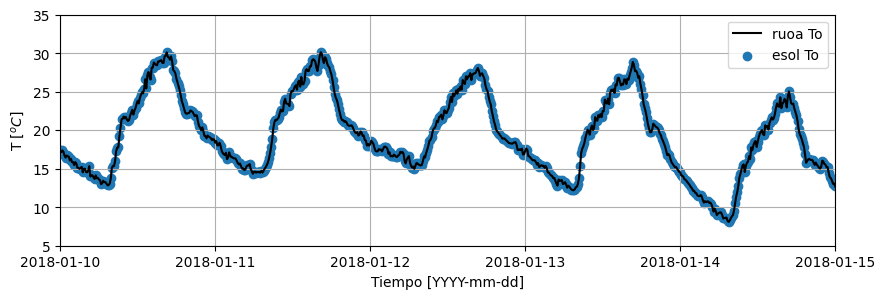

In [11]:
# Preparación de rutas
p_figs = Path("figs")
p_proc = Path("data/003_processed")

p_figs.mkdir(parents=True, exist_ok=True)
p_proc.mkdir(parents=True, exist_ok=True)

# Definir rango de fecha: desde 2018-01-10 por 5 días hacia adelante
inicio = pd.Timestamp("2018-01-10")
fin    = inicio + pd.Timedelta(days=5)

# DataFrame por rango de fecha
df_rango = df_ene2018.loc[inicio:fin]

# Configurar figura y ejes
fig, ax = plt.subplots(figsize=(10, 3))

# Línea continua negra para RUOA (To)
ax.plot(df_rango.index, df_rango[("ruoa", "To")], color="k", label="ruoa To")

# Puntos (scatter) para ESOL (To)
ax.scatter(df_rango.index, df_rango[("esol", "To")], color="tab:blue", label="esol To")

# Límites y etiquetas
ax.set_xlim(inicio, fin)
ax.set_ylim(5, 35)
ax.set_ylabel(r"T [$^oC$]")
ax.set_xlabel("Tiempo [YYYY-mm-dd]")

# Leyenda y cuadrícula
ax.legend()
ax.grid(True)

# --- Guardar figura ---
out_fig = p_figs / "To-enero.pdf"
fig.savefig(out_fig, dpi=300, bbox_inches="tight")
print(f"✅ Figura guardada en: {out_fig}")

# --- Guardar CSV con MultiIndex intacto ---
out_csv = p_proc / "enero_To.csv"
df_rango.to_csv(out_csv)
print(f"✅ DataFrame guardado en: {out_csv}")